## Cosmological recombination - solving Saha equation

We find the temperature and redshift at recombination, i.e. when electrons and protons in early universe first combined into neutral hydrogen. We use very simplified textbook approach.

In [1]:
%matplotlib inline
from scipy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import scipy.constants as const

In [2]:
const.find('Boltz')

['Boltzmann constant',
 'Boltzmann constant in Hz/K',
 'Boltzmann constant in eV/K',
 'Boltzmann constant in inverse meters per kelvin',
 'Stefan-Boltzmann constant']

In [3]:
kB = const.value('Boltzmann constant in eV/K')
me = const.value('electron mass energy equivalent in MeV')*const.mega  # m_e in eV
Q = const.value('Rydberg constant times hc in eV')  # 13.6 eV

In [4]:
eta = 0.61e-9   # baryon-to-photon number ratio
TCMB = 2.7255   # CMB temperature today in K

Saha equation, giving fractional ionization of Hydrogen as a function of temperature. See e.g. B. Ryden, _Introduction to Cosmology_ (2nd ed.) Eq. (8.34).

In [5]:
def saha(kT, X=0.5):
    """Saha quation 
       
       kT -- temperature times Boltzmann constant
        X -- fractional ionization  
    """
    return (1-X)/X**2 - 3.84*eta*(abs(kT)/me)**1.5*exp(Q/(kT))

For numerical root finding we use `scipy`'s most robust 1D algorithm.

In [6]:
kTrec = brentq(saha, 0.1, 1., args=0.5); kTrec

0.3241676443997083

In [7]:
Trec = kTrec/kB; Trec  # recombination temperature in K

3761.8105969514513

In [8]:
zrec = Trec/TCMB - 1; zrec  # recombination redshift

1379.2277002206756

In [9]:
def z(X):
    """Redshift z for given fractional ionization X"""
    kT = brentq(saha, 0.1, 1, args=X)
    return kT/(kB*TCMB) - 1

In [10]:
z(0.5)  # check

1379.2277002206756

In [11]:
Xs = np.linspace(0.999, 0.0019, 100)
zs = []
for X in Xs:
    zs.append(z(X))

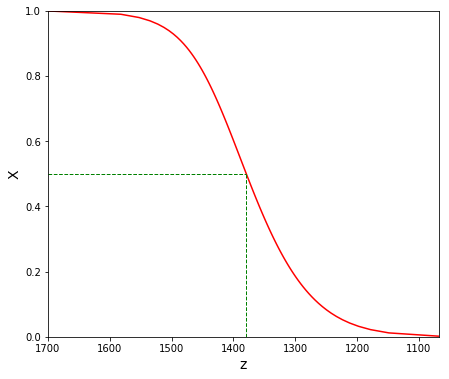

In [12]:
fig, ax = plt.subplots(figsize=[7,6])
ax.plot(zs, Xs, color='red', linestyle='-')
ax.set_xlabel('z', fontsize=14)
ax.set_ylabel('X', fontsize=14)
ax.plot((z(Xs[0]), z(0.5)), (0.5, 0.5), 'g--', lw=1)
ax.plot((z(0.5), z(0.5)), (0, 0.5), 'g--', lw=1)
ax.set_xlim(zs[-1], zs[0])
ax.set_ylim(0,1)
ax.invert_xaxis()